# 3D Visualization Using Matplotlib

##### Code partially taken from: https://stackoverflow.com/questions/49277753/python-matplotlib-plotting-cuboids
##### Code with shaded figures also found in link above - not implemented here

In [28]:
#Loading necessary modules
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt
import numpy as np
import random


In [29]:
def cuboid_data2(o, size=(1,1,1)):
    X = [[[0, 1, 0], [0, 0, 0], [1, 0, 0], [1, 1, 0]],
         [[0, 0, 0], [0, 0, 1], [1, 0, 1], [1, 0, 0]],
         [[1, 0, 1], [1, 0, 0], [1, 1, 0], [1, 1, 1]],
         [[0, 0, 1], [0, 0, 0], [0, 1, 0], [0, 1, 1]],
         [[0, 1, 0], [0, 1, 1], [1, 1, 1], [1, 1, 0]],
         [[0, 1, 1], [0, 0, 1], [1, 0, 1], [1, 1, 1]]]
    X = np.array(X).astype(float)
    for i in range(3):
        X[:,:,i] *= size[i]
    X += np.array(o)
    return X


In [30]:
def plotCubeAt2(positions,sizes=None,colors=None, **kwargs):
    if not isinstance(colors,(list,np.ndarray)): colors=["C0"]*len(positions)
    if not isinstance(sizes,(list,np.ndarray)): sizes=[(1,1,1)]*len(positions)
    g = []
    for p,s,c in zip(positions,sizes,colors):
        g.append( cuboid_data2(p, size=s) )
    return Poly3DCollection(np.concatenate(g),  
                            facecolors=np.repeat(colors,6), **kwargs)
    

<ipython-input-31-52ce90fa583e>:21: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


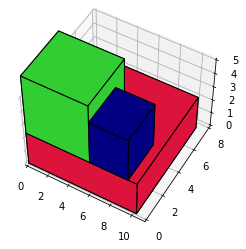

In [31]:
#Colors to choose from:
color_options=["grey","wheat","goldenrod","indianred","royalblue","slateblue","dodgerblue","darkolivegreen","teal","darkcyan","seagreen","palegreen","brown","maroon","firebrick","crimson","limegreen","navy"]

#Positions in xyz format for 3 items
positions = [(0,0,0),(0,0,2.4),(6,0,2.4)]

#length, height, and width for 3 items
sizes = [(10.32,7.52,2.4),(6,4,4.2),(3.5,3,3.0)]

#colors selected for 3 items
colors = ["crimson","limegreen","navy"]

# OR, To randomize color selection, we can do:
# colors=[]
# colors= random.sample(color_options,3)

#Creating an empty figure
fig = plt.figure()

#Selection figure in 3 dimensions
ax = fig.gca(projection='3d')

#Selecting aspect ratio
ax.set_aspect('auto')

#Axis visible or hidden
#ax.set_axis_off()

#Fill information into empty figure
pc = plotCubeAt2(positions,sizes,colors=colors, edgecolor="k")
ax.add_collection3d(pc)    

#x,y,z axis length
ax.set_xlim([0,11])
ax.set_ylim([0,8])
ax.set_zlim([0,5])

#View figure from different angles
ax.view_init(50, 300)

#Display end figure
plt.show()
